# **Selecting a Suitable Regression Algorithm for Predicting Solar Radiation**
- **Clifford Okwudili Aniakor**
- **CCUS Fall 2022**
- **M5:WA1**
- **13th September 2022** 

These datasets are meteorological data from the Hawaii Space Exploration Analog and Simulation (HI-SEAS) weather station from four months (September through December 2016) between Mission IV and Mission V.

The unit of each feature is:

- Solar radiation: watts per meter square
- Temperature: degrees Fahrenheit
- Humidity: percentage
- Barometric pressure: inch of mercury
- Wind direction: degrees
- Wind speed: miles per hour
- Sunrise/sunset: Hawaiian time

In [157]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,ElasticNet,RidgeCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [158]:
#load csv file
solar=pd.read_csv("/content/SolarPrediction.csv")

### Exploration

In [159]:
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [160]:
#view dataframe summary
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [163]:
solar.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [164]:
#descriptive stastics
solar.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [165]:
#Extract hour, minute and second
solar['Time_Hour']=solar['Time'].apply(lambda x:(x).split(":")[0]).astype(int)
solar['Time_Min']=solar['Time'].apply(lambda x:(x).split(":")[1]).astype(int)
solar['Time_Sec']=solar['Time'].apply(lambda x:(x).split(":")[2]).astype(int)
solar['SunRise_Min']=solar['TimeSunRise'].apply(lambda x:(x).split(":")[1]).astype(int)
solar['SunSet_Hour']=solar['TimeSunSet'].apply(lambda x:(x).split(":")[0]).astype(int)
solar['SunSet_Min']=solar['TimeSunSet'].apply(lambda x:(x).split(":")[1]).astype(int)

In [180]:
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_Hour,Time_Min,Time_Sec,SunRise_Min,SunSet_Hour,SunSet_Min
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,23,55,26,13,18,13
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,23,50,23,13,18,13
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,23,45,26,13,18,13
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,23,40,21,13,18,13
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,23,35,24,13,18,13


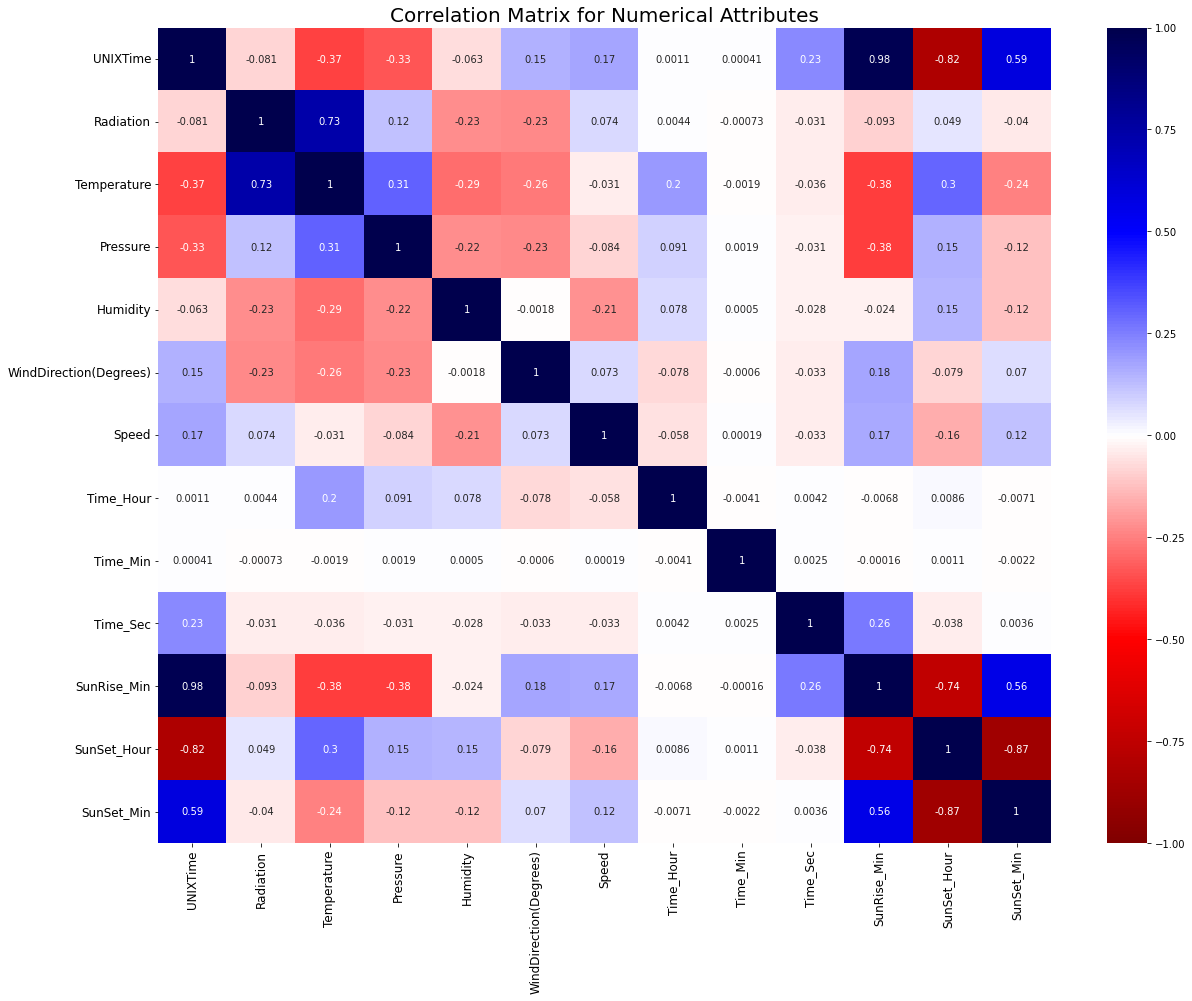

In [181]:
plt.figure(figsize=(20,15))
sns.heatmap(solar.corr(), cmap='seismic_r',annot=True,vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix for Numerical Attributes", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Modelling

In [168]:
#define predictor and target variables
X=solar.drop(['Data','Time','TimeSunRise','TimeSunSet','Radiation'],axis=1)
y=solar['Radiation']
#split for training, testing and vaidation
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.30, random_state=42)
#transform
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

In [169]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [170]:
ridge=RidgeCV()
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [171]:
elasticnet=ElasticNet()
elasticnet.fit(X_train,y_train)

ElasticNet()

In [172]:
randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train)

RandomForestRegressor()

In [173]:
gradientboosting=GradientBoostingRegressor()
gradientboosting.fit(X_train,y_train)

GradientBoostingRegressor()

### Model Evaluation

In [174]:
def metrics(model):
    pred = model.predict(X_val)
    MAE= mean_absolute_error(pred,y_val)
    MSE=mean_squared_error(pred,y_val)
    RMSE=np.sqrt(MSE)
    print('Mean Absolute Error: '+str(MAE))
    print('Root Mean Squared Error: '+str(RMSE))
    print("Test Score:" + str(model.score(X_val,y_val)))

In [175]:
print("{}:Linear Regression".format(metrics(linear)))

Mean Absolute Error: 146.85503654076027
Root Mean Squared Error: 194.30488701960894
Test Score:0.6247695823421069
None:Linear Regression


In [176]:
print("Ridge Regression:{}".format(metrics(ridge)))

Mean Absolute Error: 146.84875747137042
Root Mean Squared Error: 194.30383981674927
Test Score:0.6247736269270223
Ridge Regression:None


In [177]:
print("Elastic Net:{}".format(metrics(elasticnet)))

Mean Absolute Error: 166.46569196423226
Root Mean Squared Error: 218.67279017579355
Test Score:0.5247522362944073
Elastic Net:None


In [178]:
print("Random Forest:{}".format(metrics(randomforest)))

Mean Absolute Error: 32.233608158508154
Root Mean Squared Error: 84.35556535620725
Test Score:0.9292774241660884
Random Forest:None


In [179]:
print("Gradient Boosting{}".format(metrics(gradientboosting)))

Mean Absolute Error: 59.812661935930215
Root Mean Squared Error: 108.96298034870827
Test Score:0.8819982260532551
Gradient BoostingNone


### Conclusion
 The Random Forest Model yielded the best model evaluation metrics.